# Data Access with Zipline

Zipline is the algorithmic trading library that used to power the now-defunct Quantopian backtesting and live-trading platform. It is also available offline to develop a strategy using a limited number of free data bundles that can be ingested and used to test the performance of trading ideas.

## Zipline installation

> This notebook requires the `conda` environment `backtest`. Please see the [installation instructions](../installation/README.md) for running the latest Docker image or alternative ways to set up your environment.

There is much more information about Zipline in [Chapter 8](../../08_ml4t_workflow/04_ml4t_workflow_with_zipline).

## Imports & Settings

In [2]:
%matplotlib inline
import pandas as pd

In [3]:
%load_ext zipline

## zipline Demo

### Ingest Data

Get QUANDL API key and follow instructions to download zipline bundles [here](https://zipline.ml4trading.io/bundles.html). This boils down to running:

In [4]:
# !zipline ingest -b quandl

See `zipline` [docs](https://zipline.ml4trading.io/bundles.html) on the download and management of data bundles used to simulate backtests. 

The following commandline instruction lists the available bundles (store per default in `~/.zipline`. 

In [13]:
# !zipline bundles

### Data access using zipline

The following code illustrates how zipline permits us to access daily stock data for a range of companies. You can run zipline scripts in the Jupyter Notebook using the magic function of the same name.

First, you need to initialize the context with the desired security symbols. We'll also use a counter variable. Then zipline calls handle_data, where we use the `data.history()` method to look back a single period and append the data for the last day to a .csv file:

In [5]:
%%zipline --start 2010-1-1 --end 2018-1-1 --data-frequency daily --no-benchmark
from zipline.api import order_target, record, symbol
import pandas as pd

def initialize(context):
    context.i = 0
    context.assets = [symbol('MMM')]
    
def handle_data(context, data):
    df = data.history(context.assets, fields=['price', 'volume'], bar_count=1, frequency="1d")
    df = df.reset_index()
    
    if context.i == 0:
        df.columns = ['date', 'asset', 'price', 'volume']
        df.to_csv('stock_data.csv', index=False)
    else:
        df.to_csv('stock_data.csv', index=False, mode='a', header=None)
    context.i += 1

c:\Users\pinha\OneDrive\Documents\Trading\ml4t-code\.venv\Lib\site-packages\zipline\data\data_portal.py:951: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill", inplace=True)
<algorithm>:9: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
c:\Users\pinha\OneDrive\Documents\Trading\ml4t-code\.venv\Lib\site-packages\zipline\data\data_portal.py:951: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill", inplace=True)
<algorithm>:9: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New note

,period_open,period_close,long_exposure,pnl,capital_used,orders,short_exposure,transactions,positions,gross_leverage,...,beta,sharpe,sortino,max_drawdown,max_leverage,excess_return,treasury_period_return,trading_days,period_label,algo_volatility
2010-01-04 21:00:00+00:00,2010-01-04 14:31:00+00:00,2010-01-04 21:00:00+00:00,0.0,0.0,0.0,[],0.0,[],[],0.0,...,None,None,None,0.0,0.0,0.0,0.0,1,2010-01,NaN
2010-01-05 21:00:00+00:00,2010-01-05 14:31:00+00:00,2010-01-05 21:00:00+00:00,0.0,0.0,0.0,[],0.0,[],[],0.0,...,None,None,None,0.0,0.0,0.0,0.0,2,2010-01,0.0
2010-01-06 21:00:00+00:00,2010-01-06 14:31:00+00:00,2010-01-06 21:00:00+00:00,0.0,0.0,0.0,[],0.0,[],[],0.0,...,None,None,None,0.0,0.0,0.0,0.0,3,2010-01,0.0
2010-01-07 21:00:00+00:00,2010-01-07 14:31:00+00:00,2010-01-07 21:00:00+00:00,0.0,0.0,0.0,[],0.0,[],[],0.0,...,None,None,None,0.0,0.0,0.0,0.0,4,2010-01,0.0
2010-01-08 21:00:00+00:00,2010-01-08 14:31:00+00:00,2010-01-08 21:00:00+00:00,0.0,0.0,0.0,[],0.0,[],[],0.0,...,None,None,None,0.0,0.0,0.0,0.0,5,2010-01,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22 21:00:00+00:00,2017-12-22 14:31:00+00:00,2017-12-22 21:00:00+00:00,0.0,0.0,0.0,[],0.0,[],[],0.0,...,None,None,None,0.0,0.0,0.0,0.0,2009,2017-12,0.0
2017-12-26 21:00:00+00:00,2017-12-26 14:31:00+00:00,2017-12-26 21:00:00+00:00,0.0,0.0,0.0,[],0.0,[],[],0.0,...,None,None,None,0.0,0.0,0.0,0.0,2010,2017-12,0.0
2017-12-27 21:00:00+00:00,2017-12-27 14:31:00+00:00,2017-12-27 21:00:00+00:00,0.0,0.0,0.0,[],0.0,[],[],0.0,...,None,None,None,0.0,0.0,0.0,0.0,2011,2017-12,0.0
2017-12-28 21:00:00+00:00,2017-12-28 14:31:00+00:00,2017-12-28 21:00:00+00:00,0.0,0.0,0.0,[],0.0,[],[],0.0,...,None,None,None,0.0,0.0,0.0,0.0,2012,2017-12,0.0


We can plot the data as follows:

asset
Equity(1847 [MMM])    Axes(0.125,0.2;0.775x0.68)
Name: price, dtype: object

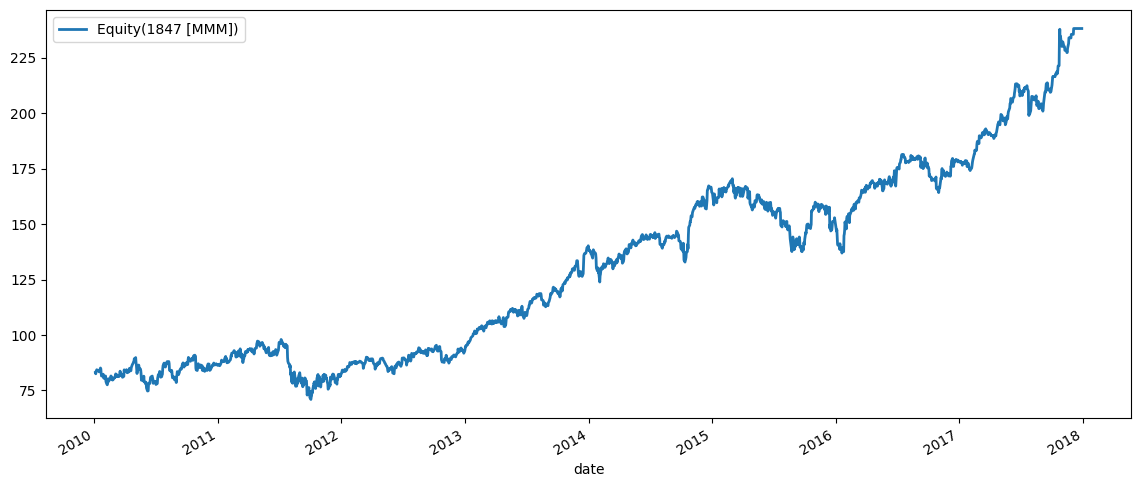

In [6]:
df = pd.read_csv('stock_data.csv')
df.date = pd.to_datetime(df.date)
df.set_index('date').groupby('asset').price.plot(lw=2, legend=True, figsize=(14, 6))

### Simple moving average strategy

The following code example illustrates a [Dual Moving Average Cross-Over Strategy](https://zipline.ml4trading.io/beginner-tutorial.html#access-to-previous-prices-using-history) to demonstrate Zipline in action:

c:\Users\pinha\OneDrive\Documents\Trading\ml4t-code\.venv\Lib\site-packages\zipline\data\data_portal.py:951: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill", inplace=True)
c:\Users\pinha\OneDrive\Documents\Trading\ml4t-code\.venv\Lib\site-packages\zipline\data\data_portal.py:951: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill", inplace=True)
c:\Users\pinha\OneDrive\Documents\Trading\ml4t-code\.venv\Lib\site-packages\zipline\data\data_portal.py:951: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill", inplace=True)
c:\Users\pinha\OneDrive\Documents\Trading\ml4t-code\.venv\Lib\site-packages\zipline\data\data_portal.py:951: FutureWarning: DataFrame.filln

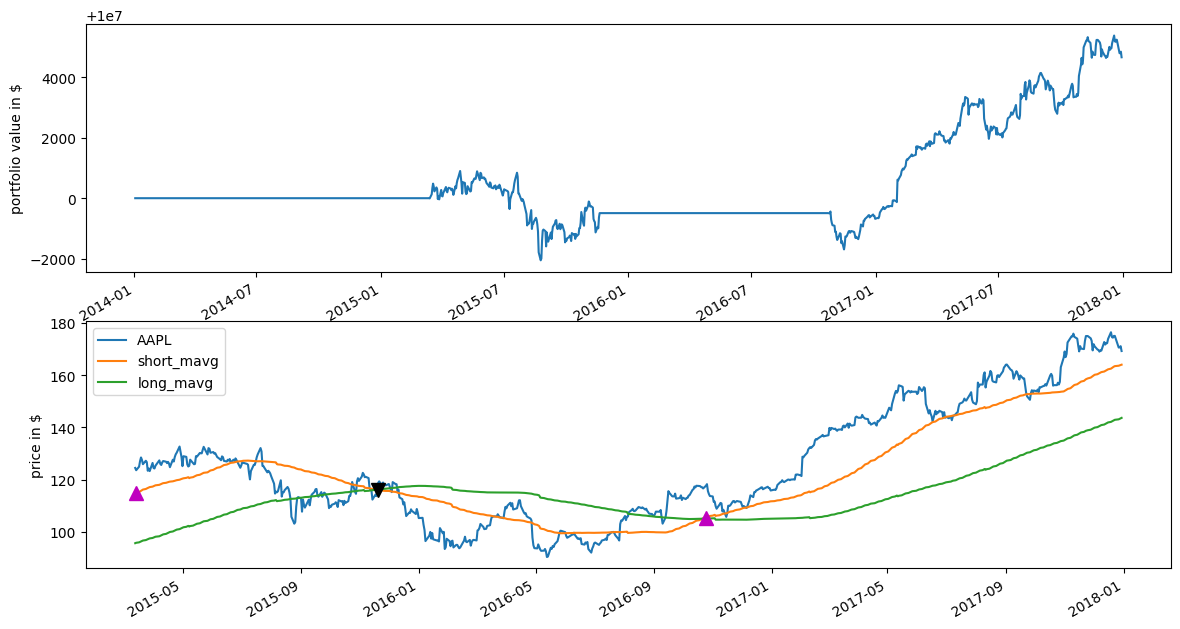

,period_open,period_close,positions,shorts_count,transactions,returns,ending_exposure,capital_used,starting_exposure,longs_count,...,excess_return,max_leverage,sortino,period_label,alpha,beta,treasury_period_return,AAPL,short_mavg,long_mavg
2014-01-02 21:00:00+00:00,2014-01-02 14:31:00+00:00,2014-01-02 21:00:00+00:00,[],0,[],0.000000e+00,0.0,0.0,0.0,0,...,0.0,0.000000,NaN,2014-01,None,None,0.0,NaN,NaN,NaN
2014-01-03 21:00:00+00:00,2014-01-03 14:31:00+00:00,2014-01-03 21:00:00+00:00,[],0,[],0.000000e+00,0.0,0.0,0.0,0,...,0.0,0.000000,NaN,2014-01,None,None,0.0,NaN,NaN,NaN
2014-01-06 21:00:00+00:00,2014-01-06 14:31:00+00:00,2014-01-06 21:00:00+00:00,[],0,[],0.000000e+00,0.0,0.0,0.0,0,...,0.0,0.000000,NaN,2014-01,None,None,0.0,NaN,NaN,NaN
2014-01-07 21:00:00+00:00,2014-01-07 14:31:00+00:00,2014-01-07 21:00:00+00:00,[],0,[],0.000000e+00,0.0,0.0,0.0,0,...,0.0,0.000000,NaN,2014-01,None,None,0.0,NaN,NaN,NaN
2014-01-08 21:00:00+00:00,2014-01-08 14:31:00+00:00,2014-01-08 21:00:00+00:00,[],0,[],0.000000e+00,0.0,0.0,0.0,0,...,0.0,0.000000,NaN,2014-01,None,None,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22 21:00:00+00:00,2017-12-22 14:31:00+00:00,2017-12-22 21:00:00+00:00,"[{'sid': Equity(8 [AAPL]), 'amount': 100, 'cos...",0,[],0.000000e+00,17501.0,0.0,17501.0,1,...,0.0,0.001763,1.012820,2017-12,None,None,0.0,175.01,163.442190,142.891860
2017-12-26 21:00:00+00:00,2017-12-26 14:31:00+00:00,2017-12-26 21:00:00+00:00,"[{'sid': Equity(8 [AAPL]), 'amount': 100, 'cos...",0,[],-4.437676e-05,17057.0,0.0,17501.0,1,...,0.0,0.001763,0.913225,2017-12,None,None,0.0,170.57,163.598280,143.075387
2017-12-27 21:00:00+00:00,2017-12-27 14:31:00+00:00,2017-12-27 21:00:00+00:00,"[{'sid': Equity(8 [AAPL]), 'amount': 100, 'cos...",0,[],2.998563e-07,17060.0,0.0,17057.0,1,...,0.0,0.001763,0.913342,2017-12,None,None,0.0,170.60,163.746503,143.259273
2017-12-28 21:00:00+00:00,2017-12-28 14:31:00+00:00,2017-12-28 21:00:00+00:00,"[{'sid': Equity(8 [AAPL]), 'amount': 100, 'cos...",0,[],4.797699e-06,17108.0,0.0,17060.0,1,...,0.0,0.001763,0.922021,2017-12,None,None,0.0,171.08,163.899520,143.445907


In [7]:
%%zipline --start 2014-1-1 --end 2018-1-1 --no-benchmark -o dma.pickle
from zipline.api import order_target, record, symbol
import matplotlib.pyplot as plt

def initialize(context):
    context.i = 0
    context.asset = symbol('AAPL')


def handle_data(context, data):
    # Skip first 300 days to get full windows
    context.i += 1
    if context.i < 300:
        return

    # Compute averages
    # data.history() has to be called with the same params
    # from above and returns a pandas dataframe.
    short_mavg = data.history(context.asset, 'price', bar_count=100, frequency="1d").mean()
    long_mavg = data.history(context.asset, 'price', bar_count=300, frequency="1d").mean()

    # Trading logic
    if short_mavg > long_mavg:
        # order_target orders as many shares as needed to
        # achieve the desired number of shares.
        order_target(context.asset, 100)
    elif short_mavg < long_mavg:
        order_target(context.asset, 0)

    # Save values for later inspection
    record(AAPL=data.current(context.asset, 'price'),
           short_mavg=short_mavg,
           long_mavg=long_mavg)


def analyze(context, perf):
    fig, (ax1, ax2) = plt.subplots(nrows=2,figsize=(14, 8))
    perf.portfolio_value.plot(ax=ax1)
    ax1.set_ylabel('portfolio value in $')

    perf['AAPL'].plot(ax=ax2)
    perf[['short_mavg', 'long_mavg']].plot(ax=ax2)

    perf_trans = perf.loc[[t != [] for t in perf.transactions]]
    buys = perf_trans.loc[[t[0]['amount'] > 0 for t in perf_trans.transactions]]
    sells = perf_trans.loc[
        [t[0]['amount'] < 0 for t in perf_trans.transactions]]
    ax2.plot(buys.index, perf.short_mavg.loc[buys.index],
             '^', markersize=10, color='m')
    ax2.plot(sells.index, perf.short_mavg.loc[sells.index],
             'v', markersize=10, color='k')
    ax2.set_ylabel('price in $')
    plt.legend(loc=0)
    plt.show() 